In [199]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from os.path import exists
from os import mkdir
import kaggle

# Load Dataset

In [200]:
# Make sure datasets directory exists
if not exists('../datasets'):
    mkdir('../datasets')

# Download dataset
dataset_path = '../datasets/wine'
if not exists(dataset_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('harrywang/wine-dataset-for-clustering', '../datasets/wine', unzip=True)

In [201]:
# Load dataset
df = pd.read_csv(dataset_path + '/wine-clustering.csv')

print(df.columns.values)

['Alcohol' 'Malic_Acid' 'Ash' 'Ash_Alcanity' 'Magnesium' 'Total_Phenols'
 'Flavanoids' 'Nonflavanoid_Phenols' 'Proanthocyanins' 'Color_Intensity'
 'Hue' 'OD280' 'Proline']


# Principal Component Analysis

In [202]:
# Scale data befor applying PCA
scaling = StandardScaler()
scaling.fit(df)
scaled_data = scaling.transform(df)

# Run PCA
num_components = min(df.shape)
principal = PCA(n_components=num_components)
principal.fit(scaled_data)
x = principal.transform(scaled_data)
x = pd.DataFrame(x, columns=[f'PCA {i+1}' for i in range(num_components)])

# Check the dimensions of data after PCA
print(x.shape)

(178, 13)


Select a target and run the below cells to see visualization

`OD280` and `Flavanoids` have good clustering

In [208]:
print(' | '.join(df.columns.values))
target = 'OD280'

Alcohol | Malic_Acid | Ash | Ash_Alcanity | Magnesium | Total_Phenols | Flavanoids | Nonflavanoid_Phenols | Proanthocyanins | Color_Intensity | Hue | OD280 | Proline


Text(0, 0.5, 'pc2')

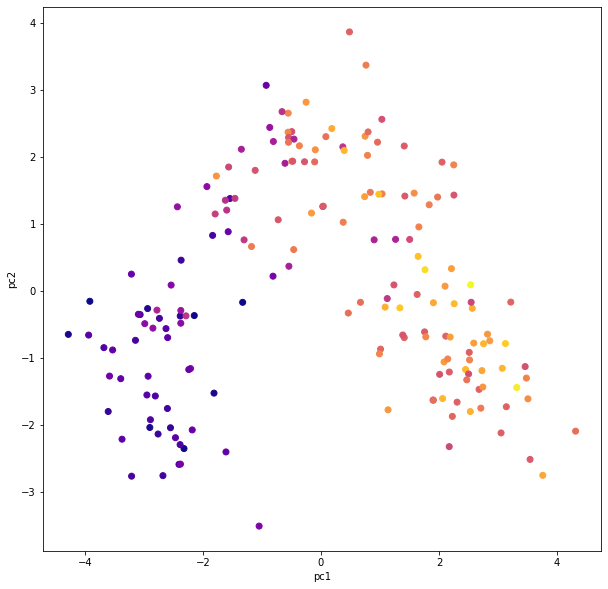

In [204]:
plt.figure(figsize=(10, 10))
plt.scatter(x['PCA 1'], x['PCA 2'], c=df[target], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

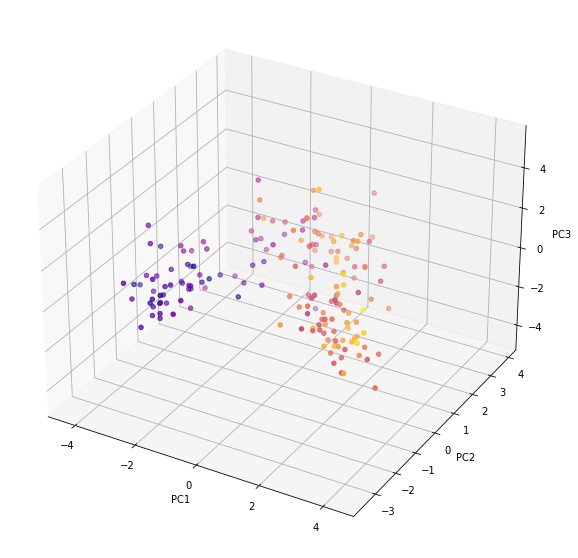

In [205]:
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(x['PCA 1'], x['PCA 2'], x['PCA 3'], c=df[target], cmap='plasma')
axis.set_xlabel('PC1', fontsize=10)
axis.set_ylabel('PC2', fontsize=10)
axis.set_zlabel('PC3', fontsize=10)

Text(0, 0.5, 'Variance Ratio (%)')

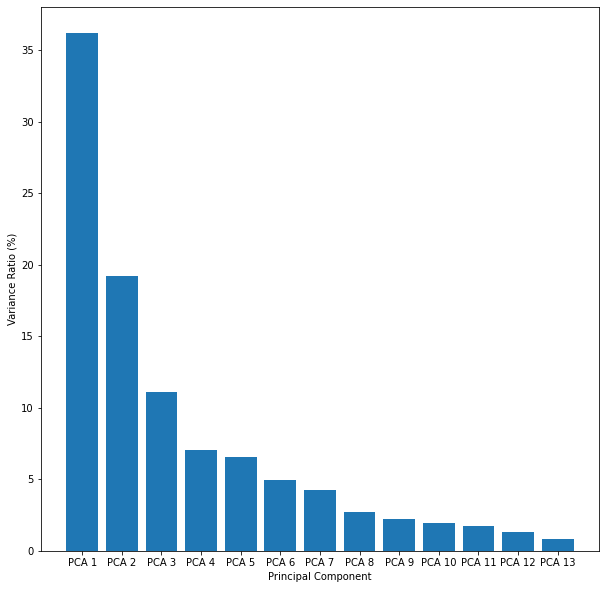

In [209]:
plt.figure(figsize=(10, 10))
plt.bar(x=x.columns.values, height=[100 * i for i in principal.explained_variance_ratio_])
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio (%)')